In [8]:
# import yfinance as yf
# !pip install yfinance
!pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ------------------ --------------------- 1.8/4.0 MB 9.7 MB/s eta 0:00:01
   ---------------------------------------- 4.0/4.0 MB 12.8 MB/s  0:00:00

   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   -------------------- ------------------- 1/2 [pandas_datareader]
   -------------------- ------------------- 1/2 [pandas_datareader]
   -------------------- ------------------- 1/2 [pandas_datareader]
   -------------------- ------------------- 1/2 [pandas_datareader]
   -------------------- ------------------- 1/2 [pandas_datareader]
   -------------------- ------------------- 1/2 [pandas_datareader]
   -------------------- ------------------- 1/2 [pandas_datareader]
   ---

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
from pandas_datareader import data as pdr

In [10]:
endDate = dt.datetime.now()

startDate = endDate - dt.timedelta(days = 365*5)
endDate, startDate

(datetime.datetime(2025, 9, 30, 9, 31, 38, 477847),
 datetime.datetime(2020, 10, 1, 9, 31, 38, 477847))

In [ ]:
stocks = ['MSFT', 'SPY', 'QQQ']

In [27]:
df = yf.download(stocks, start = startDate, end = endDate,auto_adjust=False)

[*********************100%***********************]  3 of 3 completed



In [28]:
df.head()

Price        Adj Close                               Close              \
Ticker            MSFT         QQQ         SPY        MSFT         QQQ   
Date                                                                     
2020-10-01  203.712067  273.759979  314.209229  212.460007  282.250000   
2020-10-02  197.700211  266.058868  311.225830  206.190002  274.309998   
2020-10-05  201.717667  271.732971  316.744965  210.380005  280.160004   
2020-10-06  197.431717  266.883270  312.242035  205.910004  275.160004   
2020-10-07  201.190353  271.500092  317.677155  209.830002  279.920013   

Price                         High                                 Low  \
Ticker             SPY        MSFT         QQQ         SPY        MSFT   
Date                                                                     
2020-10-01  337.040009  213.990005  282.880005  338.739990  211.320007   
2020-10-02  333.839996  210.990005  282.239990  337.010010  205.539993   
2020-10-05  339.760010  210.410004  280.489990  339.959991  206.979996   
2020-10-06  334.929993  210.179993  281.190002  342.170013  204.820007   
2020-10-07  340.760010  210.110001  280.739990  341.630005  206.720001   

Price                                     Open                          \
Ticker             QQQ         SPY        MSFT         QQQ         SPY   
Date                                                                     
2020-10-01  279.839996  335.010010  213.490005  281.790009  337.690002   
2020-10-02  273.440002  331.190002  208.000000  276.019989  331.700012   
2020-10-05  276.230011  336.010010  207.220001  276.339996  336.059998   
2020-10-06  274.250000  334.380005  208.820007  279.450012  339.910004   
2020-10-07  277.279999  338.089996  207.059998  277.890015  338.119995   

Price         Volume                      
Ticker          MSFT       QQQ       SPY  
Date                                      
2020-10-01  27158400  50020200  88698700  
2020-10-02  33154800  75497400  89431100  
2020-10-05  21331600  28184600  45713100  
2020-10-06  28554300  49704200  90128900  
2020-10-07  25681100  27539700  56999600

In [29]:
close_prices = df['Adj Close']

In [31]:
close_prices.head()

Ticker,MSFT,QQQ,SPY
Date,,,
2020-10-01,203.712067,273.759979,314.209229
2020-10-02,197.700211,266.058868,311.225830
2020-10-05,201.717667,271.732971,316.744965
2020-10-06,197.431717,266.883270,312.242035
2020-10-07,201.190353,271.500092,317.677155


In [32]:
log_returns = np.log(close_prices/close_prices.shift(1))
log_returns.head()

Ticker,MSFT,QQQ,SPY
Date,,,
2020-10-01,NaN,NaN,NaN
2020-10-02,-0.029956,-0.028534,-0.009540
2020-10-05,0.020117,0.021102,0.017578
2020-10-06,-0.021476,-0.018008,-0.014318
2020-10-07,0.018859,0.017151,0.017257


In [33]:
cumulative_log_returns = log_returns.cumsum()

<Axes: title={'center': 'cumulative returns'}, xlabel='Date'>

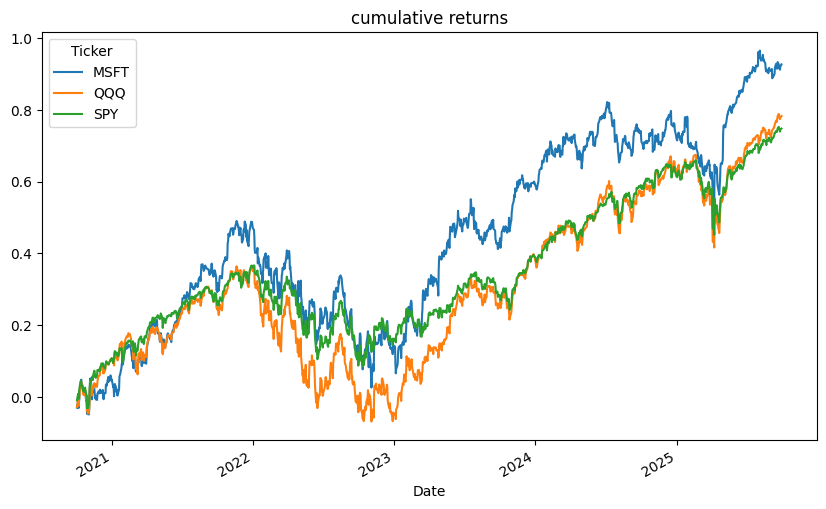

In [34]:
cumulative_log_returns.plot(title = 'cumulative returns', figsize = (10,6))